In [33]:
# coding:utf-8
import matplotlib.pyplot as plt
# 通过plt显示图片
def show_pic(image):
    plt.imshow(image)
    plt.show()

In [34]:
import cv2
# 显示图片中人脸的数据
def find_face(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
    # print(face_cascade.empty())
    face = face_cascade.detectMultiScale(
        image,
        scaleFactor=1.1,
        minNeighbors=3,
        minSize=(15, 15)
    )
    if len(face) > 0:
        x, y, w, h = face[0]
        face = image[y:y + h, x:x + w]
        return True, face
    return False, []

In [35]:
# 得到脸部灰度轮廓和黑白轮廓
import numpy as np
def get_face_outline(face):
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face, (128, 128))
    face_outline = []
    for i in range(face.shape[0]):
        row = []
        for j in range(face.shape[1]):
            row.append(face[i:i + 3, j:j + 3].max())
        face_outline.append(row)
    ret, wb = cv2.threshold(np.array(face_outline), np.array(face_outline).mean(), 255, cv2.THRESH_TOZERO)
    return np.array(face_outline)

In [36]:
# 得到平均相似度
def close_face(face1,face2):
    close=(face1==face2).mean()
    return close
    

0.016357421875
0.01318359375
0.012451171875
0.011474609375
0.0113525390625
0.0108642578125
0.01019287109375
0.01007080078125
0.00982666015625
0.0093994140625


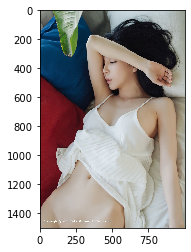

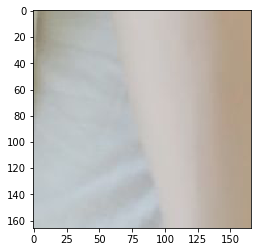

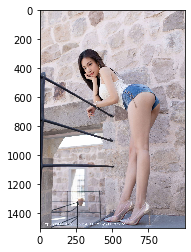

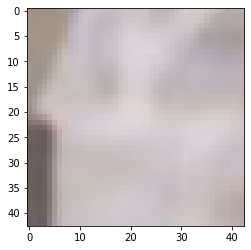

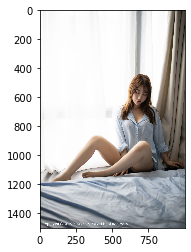

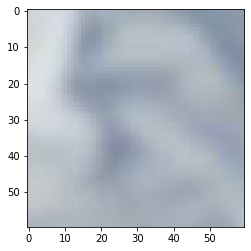

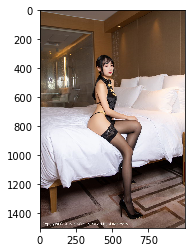

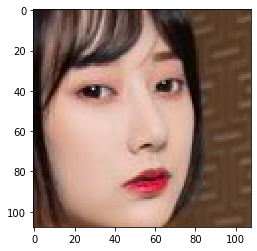

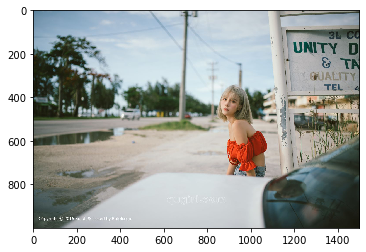

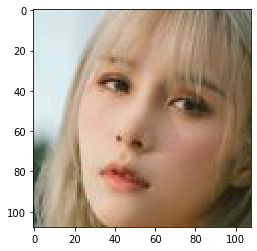

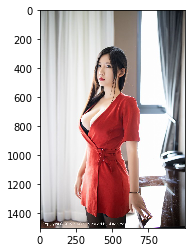

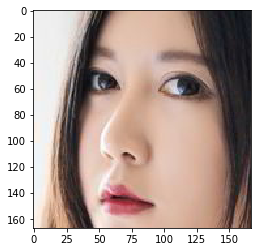

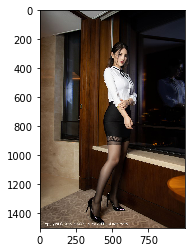

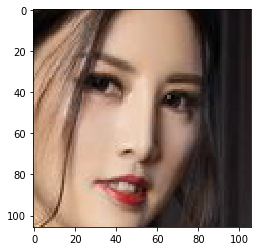

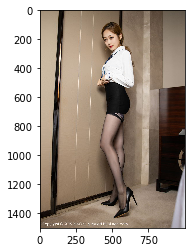

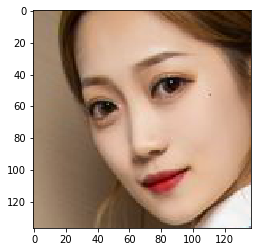

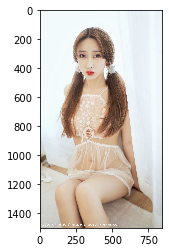

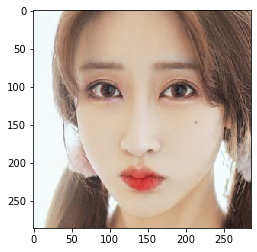

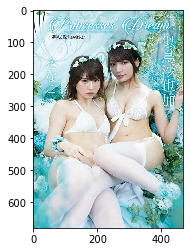

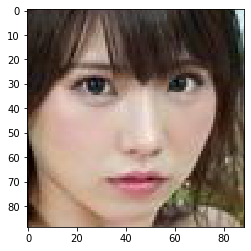

In [37]:
# 基准脸部
image = plt.imread('F:\\nstest\\a (33).jpg')
face_base = find_face(image)
face_base_outline = get_face_outline(face_base[1])
faces_close = []
# 显示图片
import os
for pic_file in os.listdir('F:\\nvtest'):
    if pic_file.startswith('.'): continue
    image = plt.imread('F:\\nvtest\\' + pic_file)
    # print(pic_file)
    # show_pic(image)
    face = find_face(image)
    if face[0]:
        # show_pic(face[1])
        # show_pic(get_face_outline(face[1]))
        face_outline = get_face_outline(face[1])
        close = close_face(face_base_outline, face_outline)
        faces_close.append((image, face[1], close))

# 显示前10张相似的图片
faces_close.sort(key=lambda x: x[2], reverse=True)
for face in faces_close[:10]:
    print(face[2])
    show_pic(face[0])
    show_pic(face[1])
